In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression as lr
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as gb
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay


In [11]:
# Load the dataset
wine=pd.read_csv('/content/WineQT.csv')

In [ ]:
# datatype
print(type(wine))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# information related to dataset
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 1 columns):
 #   Column                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                   --------------  ----- 
 0   fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"  4898 non-null   object
dtypes: object(1)
memory usage: 38.4+ KB
None


In [ ]:
# checks for the missing values if any
missing=wine.isnull().sum()
print(missing)

In [ ]:
# gives a brief about the structure of the dataset
print(wine.head)

In [ ]:
# check the features and labels in the dataset
from collections import Counter
x=wine.drop(columns=['quality','Id']) # dropping the target colum(quality) and id column
y=wine['quality']
x.shape
y.shape
print(Counter(y))

In [ ]:
# printing the features and targets
print("features:\n",x.head())
print("target:\n",y.head())

Data Visualization

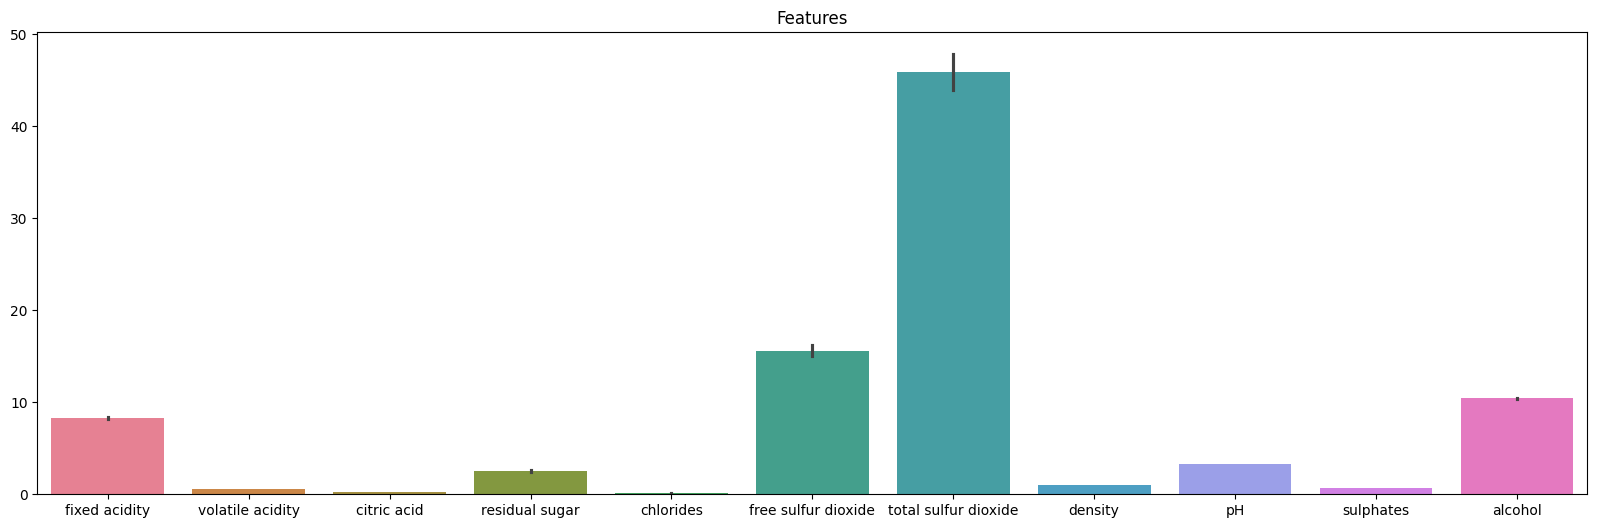

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x)
plt.title('Features')
plt.show()

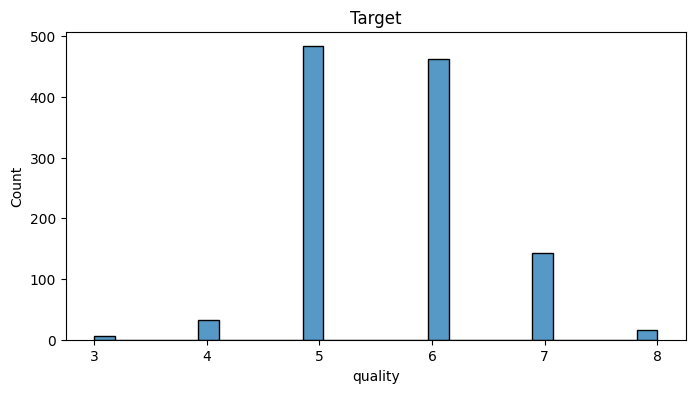

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(x=wine['quality'])
plt.title('Target')
plt.show()

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x=wine['fixed acidity'],y=wine['quality'],color='red')
plt.title('Fixed Acidity plot')
plt.show()


In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x=wine['volatile acidity'],y=wine['quality'],color='green')
plt.title('Volatile Acidity plot')
plt.show()


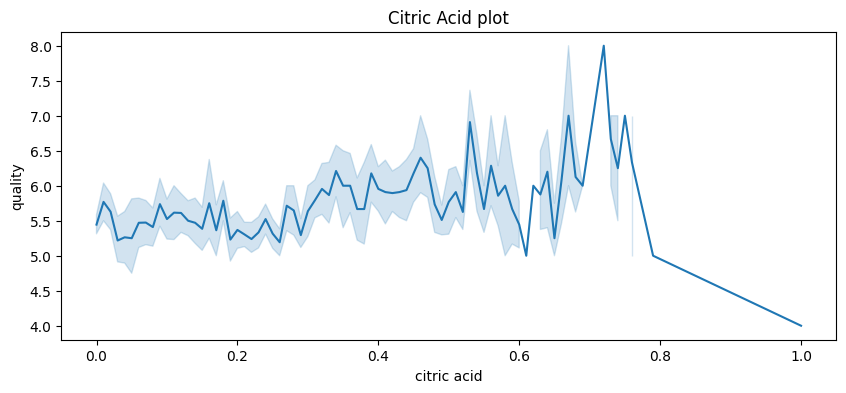

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x=wine['citric acid'],y=wine['quality'],color='blue')
plt.title('Citric Acid plot')
plt.show()


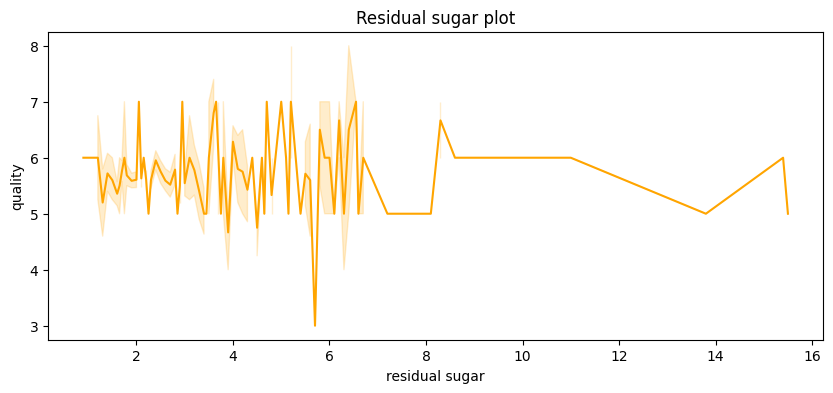

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x=wine['residual sugar'],y=wine['quality'],color='orange')
plt.title('Residual sugar plot')
plt.show()


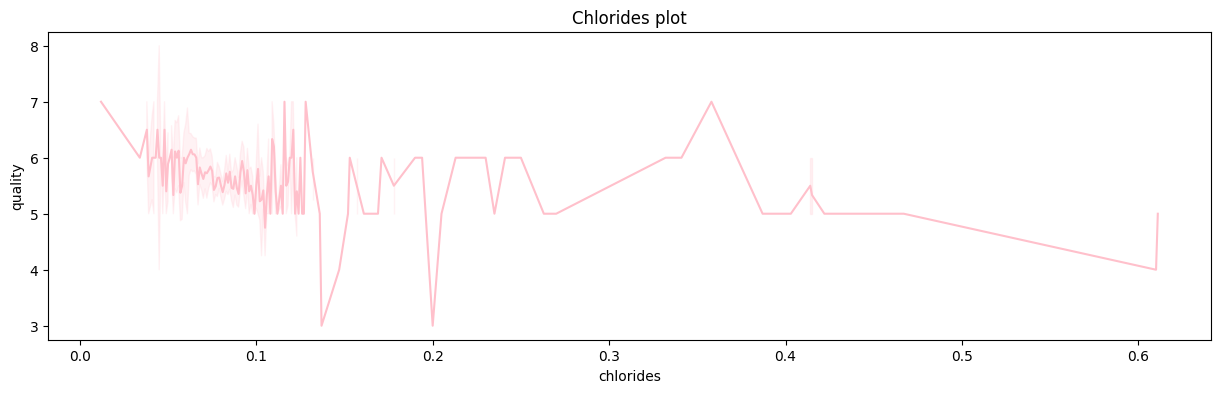

In [ ]:
plt.figure(figsize=(15,4))
sns.lineplot(x=wine['chlorides'],y=wine['quality'],color='pink')
plt.title('Chlorides plot')
plt.show()


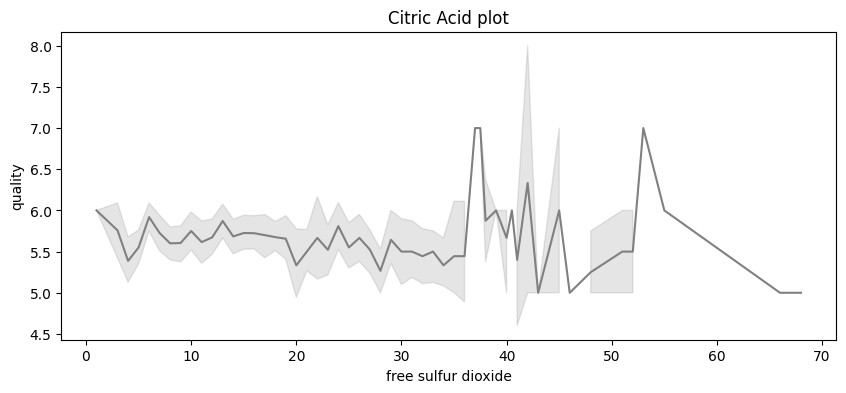

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x=wine['free sulfur dioxide'],y=wine['quality'],color='grey')
plt.title(' Free Sulfur Dioxide Plot')
plt.show()


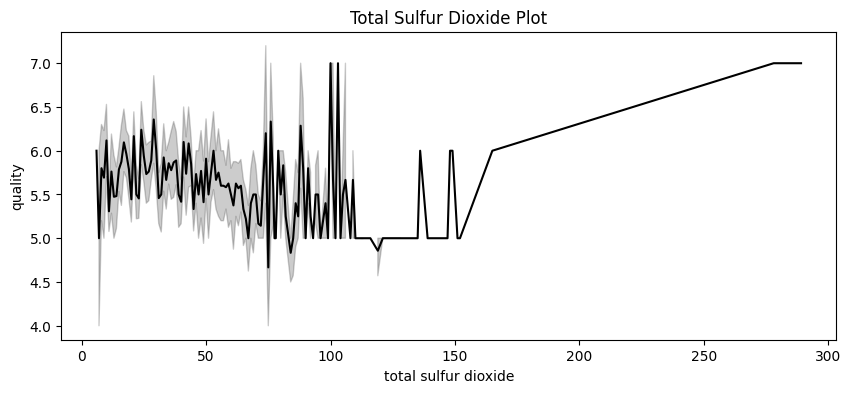

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x=wine['total sulfur dioxide'],y=wine['quality'],color='black')
plt.title('Total Sulfur Dioxide Plot')
plt.show()


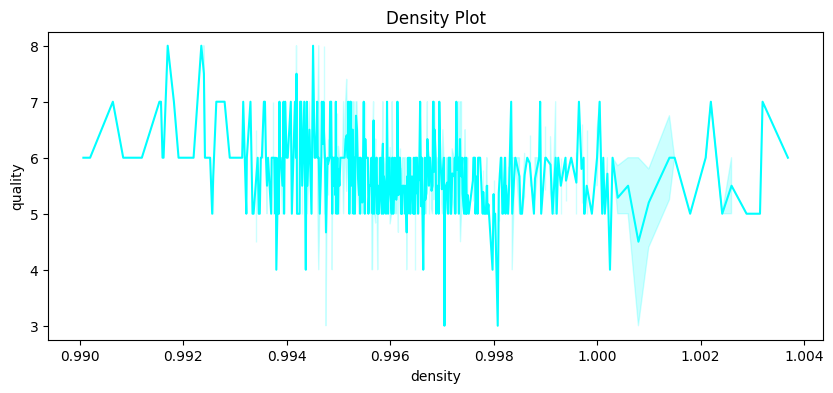

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x=wine['density'],y=wine['quality'],color='cyan')
plt.title('Density Plot')
plt.show()


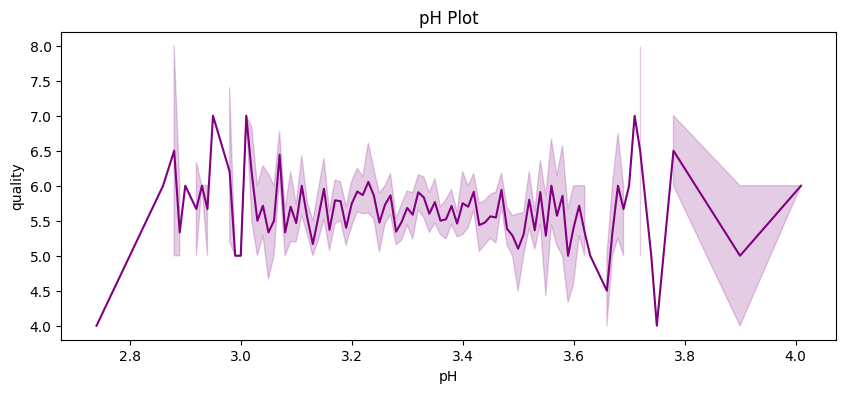

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x=wine['pH'],y=wine['quality'],color='purple')
plt.title('pH Plot')
plt.show()


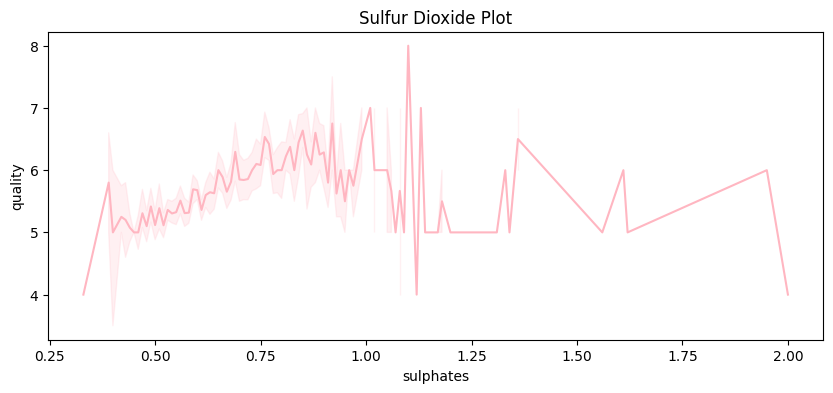

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x=wine['sulphates'],y=wine['quality'],color='lightpink')
plt.title('Sulphate Plot')
plt.show()


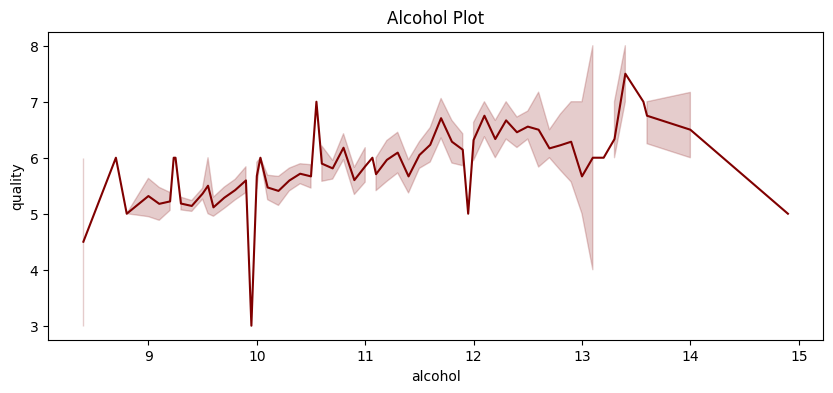

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(x=wine['alcohol'],y=wine['quality'],color='maroon')
plt.title('Alcohol Plot')
plt.show()


MODEL TRAINING

In [ ]:
# splitting the dataset  into training and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [ ]:
# feature scaling
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)

Classification algorithms

**LOGISTIC REGRESSION**

In [16]:
model1=lr(multi_class='multinomial',max_iter=1000,class_weight='balanced')

In [17]:
param_grid1={
    'C':[0.1],
    'solver':['lbfgs'],
    'penalty':['l2']

}

In [18]:
grid_search=GridSearchCV(estimator=lr(),param_grid=param_grid1,cv=5,scoring='accuracy',error_score='raise')
grid_search.fit(x_train_sc,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=LogisticRegression(),
             param_grid={'C': [0.1], 'penalty': ['l2'], 'solver': ['lbfgs']},
             scoring='accuracy')

In [19]:
model1=grid_search.best_estimator_
model1.fit(x_train_sc,y_train)

LogisticRegression(C=0.1)

In [20]:

y_pred1=model1.predict(x_test_sc)
# print(y_train[0:9])
# print(y_pred1[0:9])
print('Accuracy achieved',accuracy_score(y_test,y_pred1))
print('Confusion Matrix:\n ',confusion_matrix(y_test,y_pred1))
print("Classification Report:\n",classification_report(y_test, y_pred1,zero_division=0))



Accuracy achieved 0.6506550218340611
Confusion Matrix:
  [[ 0  3  3  0  0]
 [ 0 71 23  2  0]
 [ 0 28 67  4  0]
 [ 0  2 13 11  0]
 [ 0  0  0  2  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.74      0.71        96
           6       0.63      0.68      0.65        99
           7       0.58      0.42      0.49        26
           8       0.00      0.00      0.00         2

    accuracy                           0.65       229
   macro avg       0.38      0.37      0.37       229
weighted avg       0.63      0.65      0.64       229



<Figure size 600x600 with 0 Axes>

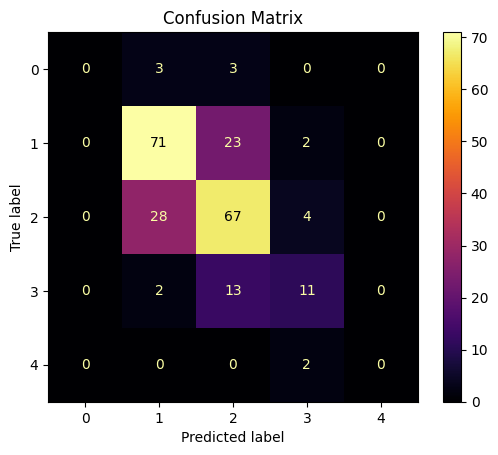

In [47]:
cm=confusion_matrix(y_test,y_pred1)

plt.figure(figsize=(6,6))
disp=ConfusionMatrixDisplay(confusion_matrix=m)
disp.plot(cmap=plt.cm.inferno)
plt.title('Confusion Matrix')
plt.show()



**DECISION TREE**

In [48]:
model2=dt(random_state=42)

In [49]:
param_grid2={
    'criterion':['entropy'],
    'max_depth':[None],
    'min_samples_leaf':[1],
    'min_samples_split':[2]

}

In [50]:

grid_search2=GridSearchCV(estimator=dt(),param_grid=param_grid2,cv=5,scoring='accuracy',error_score='raise')
grid_search2.fit(x_train_sc,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'], 'max_depth': [None],
                         'min_samples_leaf': [1], 'min_samples_split': [2]},
             scoring='accuracy')

In [51]:
model2=grid_search2.best_estimator_
model2.fit(x_train_sc,y_train)

DecisionTreeClassifier(criterion='entropy')

In [52]:
y_pred2=model2.predict(x_test_sc)
print(y_train[1:4])
print(y_pred2[1:4])
print('Accuracy acieved',(accuracy_score(y_test,y_pred2)*100))
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred2))
print("Classification Report:\n",classification_report(y_test, y_pred2,zero_division=0))


758     6
636     5
1109    5
Name: quality, dtype: int64
[6 5 5]
Accuracy acieved 59.388646288209614
Confusion Matrix 
 [[ 0  0  0  0  0  0]
 [ 0  0  3  2  1  0]
 [ 1  4 60 29  2  0]
 [ 0  2 30 61  5  1]
 [ 0  0  1  9 15  1]
 [ 0  0  0  0  2  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.64      0.62      0.63        96
           6       0.60      0.62      0.61        99
           7       0.60      0.58      0.59        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.31      0.30      0.30       229
weighted avg       0.60      0.59      0.60       229



<Figure size 600x600 with 0 Axes>

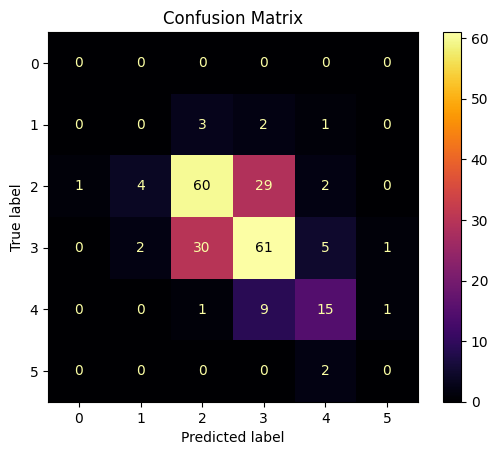

In [54]:
cm2=confusion_matrix(y_test,y_pred2)

plt.figure(figsize=(6,6))
disp=ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(cmap=plt.cm.inferno)
plt.title('Confusion Matrix')
plt.show()


**RANDOM FOREST**

In [55]:
model3=rf(random_state=42)


In [56]:

grid_param3={
    'n_estimators':[100,200,200],
    'max_depth':[10,20,30],
    'min_samples_split':[2],
    'min_samples_leaf':[1],


}

In [57]:
grid_search3=GridSearchCV(estimator=model3,param_grid=grid_param3,cv=5,scoring='accuracy',error_score='raise')
grid_search3.fit(x_train_sc,y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [100, 200, 200]},
             scoring='accuracy')

In [58]:
model3 = grid_search3.best_estimator_
model3.fit(x_train_sc,y_train)

RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)

In [59]:

y_pred3 = model3.predict(x_test_sc)
print(y_train[0:7])
print(y_pred3[0:7])
print('Accuracy achieved',accuracy_score(y_test,y_pred3)*100)
print('Confusion Matrix:\n ',confusion_matrix(y_test,y_pred3))
print("Classification Report:\n",classification_report(y_test, y_pred3,zero_division=0))


12      7
758     6
636     5
1109    5
743     5
620     6
673     7
Name: quality, dtype: int64
[5 6 5 5 5 6 5]
Accuracy achieved 70.3056768558952
Confusion Matrix:
  [[ 0  3  3  0  0]
 [ 0 77 19  0  0]
 [ 0 28 67  4  0]
 [ 0  0  9 17  0]
 [ 0  0  2  0  0]]
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.67      0.68      0.67        99
           7       0.81      0.65      0.72        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.44      0.43      0.43       229
weighted avg       0.68      0.70      0.69       229



<Figure size 600x600 with 0 Axes>

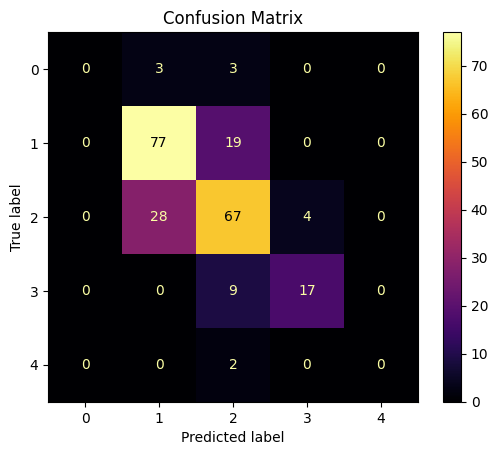

In [60]:
cm3=confusion_matrix(y_test,y_pred3)

plt.figure(figsize=(6,6))
disp=ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot(cmap=plt.cm.inferno)
plt.title('Confusion Matrix')
plt.show()


**GRADIENT BOOSTING**

In [61]:
model4=gb(random_state=42)

In [62]:
param_grid4={
    'learning_rate': [0.05],
    'n_estimators':[100,200,300],
    'max_depth':[3],
    'min_samples_split':[2],
    'min_samples_leaf':[1],
}

In [63]:
grid_search4=GridSearchCV(estimator=gb(),param_grid=param_grid4,cv=5,scoring='accuracy',error_score='raise')
grid_search4.fit(x_train_sc,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05], 'max_depth': [3],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [64]:
model4=grid_search4.best_estimator_
model4.fit(x_train_sc,y_train)

GradientBoostingClassifier(learning_rate=0.05)

In [65]:

y_pred4=model4.predict(x_test_sc)
print(y_train[10:17])
print(y_pred4[10:17])
print('Accuracy achieved',accuracy_score(y_test,y_pred4)*100)
print('Confusion Matrix ',confusion_matrix(y_test,y_pred4))
print("Classification Report (Micro Average):")
print(classification_report(y_test, y_pred4,zero_division=0))

430     6
1104    8
265     6
736     6
1060    5
1048    5
784     6
Name: quality, dtype: int64
[7 6 5 6 4 5 5]
Accuracy achieved 64.19213973799127
Confusion Matrix  [[ 0  0  0  0  0  0]
 [ 0  0  3  3  0  0]
 [ 1  1 73 20  0  1]
 [ 1  1 28 63  5  1]
 [ 0  0  0 15 11  0]
 [ 0  0  0  1  1  0]]
Classification Report (Micro Average):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.70      0.76      0.73        96
           6       0.62      0.64      0.63        99
           7       0.65      0.42      0.51        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.33      0.30      0.31       229
weighted avg       0.63      0.64      0.64       229



<Figure size 600x600 with 0 Axes>

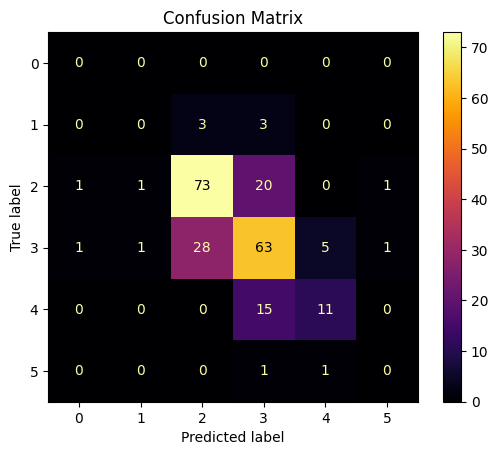

In [66]:
cm4=confusion_matrix(y_test,y_pred4)

plt.figure(figsize=(6,6))
disp=ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot(cmap=plt.cm.inferno)
plt.title('Confusion Matrix')
plt.show()
